In [16]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x,derive=False):
    if derive: return np.exp(-x) / (1 + np.exp(-x))**2
    return 1 / (1 + np.exp(-x))

def tanh(x,derive=False):
    if derive: (4 * np.exp(-2 * x)) / (1 + np.exp(-2 * x))**2
    return (1 - np.exp(-2 * x)) / (1 + np.exp(-2 * x))

def relu(x,derive=False):
    if derive: return x>0
    return np.maximum(0,x)

def leaky_relu(x,derive=False):
    if derive: 
        x[x>=0] = 1
        x[x<0] = 0.01
        return x
    x[x<0] *= 0.01
    return x

class Neuron:
    def __init__(self,shape,function,bias=0):
        self.shape = shape
        self.function = function
        self.bias = bias
    
    def activation(self,x_data,weight):
        wx = np.dot(x_data,weight)+self.bias
        return self.function(wx)
    
    def loss(self,y):
        return self.function(y,derive=True)   

class Network:
    def __init__(self,neuron,x_train,y_train,weight,learning_rate=1):
        self.neuron = neuron
        self.x_train = x_train
        self.y_train = y_train.T
        self.weight = weight
        self.learning_rate = learning_rate
        self.loss = []

    def backpropagation(self,neuron,out_train):
        self.weight += np.dot(self.x_train.T,(self.y_train-out_train)*neuron.loss(out_train)) * self.learning_rate

    def train(self,iter_num,verbose=1):
        for i in range(1,iter_num+1):
            for n in self.neuron:
                out_train = n.activation(self.x_train,self.weight) # Calculate the outputs for each training examples
                if i%(int(iter_num/verbose))==0: print(i,out_train)
                self.loss.append(np.square(np.subtract(self.y_train,out_train)).mean())
                self.backpropagation(n,out_train) # Run the NN adjustments 
    def predict(self,data):
        return self.neuron[-1].activation(data, self.weight)

10000 [[0.91907705]
 [0.8989141 ]
 [0.82959951]
 [0.89883854]
 [0.90487996]
 [0.92329775]
 [0.7879659 ]
 [0.76167927]
 [0.84849722]
 [0.90353754]
 [0.75911819]
 [0.71759421]
 [0.4233789 ]
 [0.57809288]]
Loss Value:  0.000712264467602495


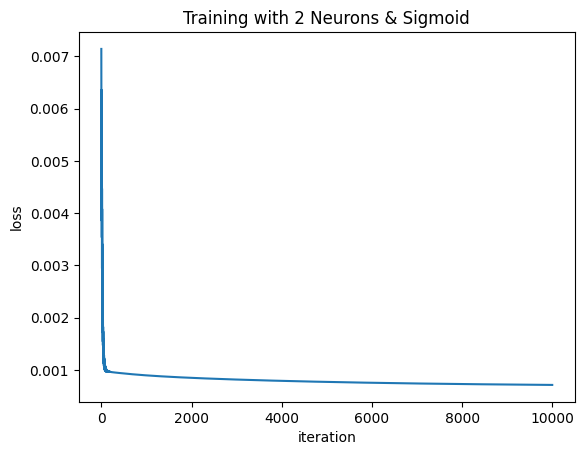

In [17]:
# read train data
scale = 100

data_x = np.array([
                [11,86,90,93.5,93,90.63,90,99,106,98.33],
                [11,85.5,70,86.5,88.5,82.63,91,88,90,89.67],
                [10,77,63.5,58.5,78,69.25,82,73,65,73.33],
                [8,82.5,75.5,87.5,82.5,82,75,99,91,88.33],
                [11,91,89,88.5,89.75,89.56,105,97,114,105.33],
                [11,94.5,89.5,95.5,90.5,92.5,93,116,112,107],
                [6,78.25,63.5,62.5,67.25,67.88,94,66,77,79],
                [5,86.5,90.5,82.5,0,64.88,85,94,90,89.67],
                [11,85,62,63,84.5,73.63,96,95,74,88.33],
                [10,89,77.5,90,90.5,86.75,95,105,97,99],
                [8,91.25,90.5,88.5,0,67.56,83,83,60,75.33],
                [7,70.5,61.5,59,52,60.75,98,95,38,77],
                [7,84,0,0,0,21,65,0,0,21.67],
                [11,64,9,0,0,18.25,85,48,71,68],
])/scale
data_y = np.array([[94,89,79,85,95,96,75,75,85,91,76,73,44,57]])/scale
x_train = data_x
y_train = data_y

np.random.seed(0) # np.random.seed(int(np.random.uniform(1, 10000))
weight =  2 * np.random.rand(x_train.shape[1],1) - 1

# Train Model
n = [
    Neuron(x_train.shape[1],sigmoid)
]

net = Network(
    neuron=n,
    x_train=x_train,
    y_train=y_train,
    weight=weight,
    learning_rate=1
)
net.train(iter_num=10000,verbose=1)

print("Loss Value: ",net.loss[-1])
plt.plot(np.arange(10000),net.loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title('Training with 2 Neurons & Sigmoid')
plt.show()

In [18]:
# Prediction
x_test = np.array([11,64,9,0,0,18.25,85,48,71,68])/100
prediction = net.predict(x_test) * 100
print('The final prediction is ',prediction)

The final prediction is  [57.80934375]


[[0.91658784]
 [0.87419272]
 [0.76008219]
 [0.84381944]
 [0.92877954]
 [0.93358345]
 [0.74131718]
 [0.74572294]
 [0.8439813 ]
 [0.90369741]
 [0.72108723]
 [0.707979  ]
 [0.44605976]
 [0.54452063]]
Loss Value:  0.00047898112553300664


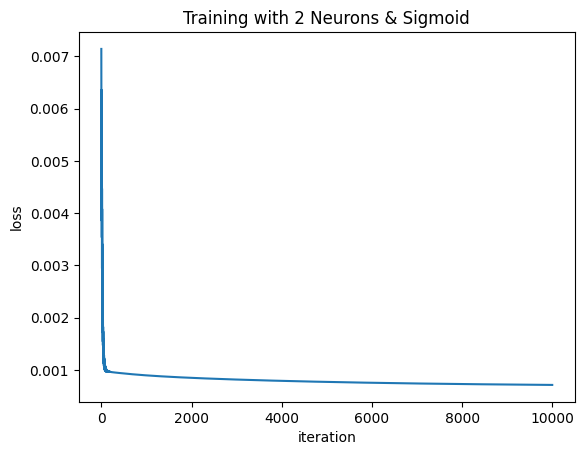

In [19]:
# Reference from ChatGPT, 2 neurons code

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network architecture
input_size = x_train.shape[1]
hidden_size = 1
output_size = 1

# Initialize the weights and biases
weights1 = np.random.rand(input_size, hidden_size)
bias1 = np.random.rand(1, hidden_size)
weights2 = np.random.rand(hidden_size, output_size)
bias2 = np.random.rand(1, output_size)

# Define the input and output
X = x_train
y = y_train.T

loss = []

for i in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights1) + bias1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights2) + bias2
    output_layer_output = sigmoid(output_layer_input)

    loss.append(np.square(np.subtract(y,output_layer_output)).mean())

    # Backward propagation
    error = y - output_layer_output
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden = d_output.dot(weights2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Calculate the gradients
    d_weights2 = hidden_layer_output.T.dot(d_output)
    d_bias2 = np.sum(d_output, axis=0, keepdims=True)
    d_weights1 = X.T.dot(d_hidden)
    d_bias1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update the weights and biases
    weights1 += d_weights1
    bias1 += d_bias1
    weights2 += d_weights2
    bias2 += d_bias2

hidden_layer_input = np.dot(X, weights1) + bias1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights2) + bias2
output_layer_output = sigmoid(output_layer_input)
print(output_layer_output)

print("Loss Value: ",loss[-1])
plt.plot(np.arange(10000),net.loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title('Training with 2 Neurons & Sigmoid')
plt.show()


[[0.93047451]
 [0.89134824]
 [0.78003524]
 [0.86246179]
 [0.94141181]
 [0.94567576]
 [0.76110753]
 [0.76556445]
 [0.86261735]
 [0.91874563]
 [0.7405462 ]
 [0.72714308]
 [0.45095616]
 [0.55605472]]
Loss Value:  0.000137751393295708


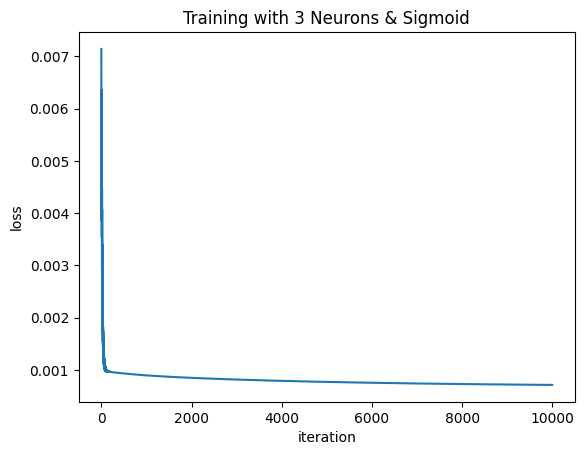

In [20]:
# 3 neurons code

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network architecture
input_size = x_train.shape[1]
hidden_size = 1
output_size = 1

# Initialize the weights and biases
weights1_1 = np.random.rand(input_size, hidden_size)
bias1_1 = np.random.rand(1, hidden_size)
weights1_2 = np.random.rand(input_size, hidden_size)
bias1_2 = np.random.rand(1, hidden_size)

weights2 = np.random.rand(hidden_size, output_size)
bias2 = np.random.rand(1, output_size)

# Define the input and output
X = x_train
y = y_train.T

loss = []

for i in range(10000):
    # Forward propagation
    hidden_layer_input_1 = np.dot(X, weights1_1) + bias1_1
    hidden_layer_output_1 = sigmoid(hidden_layer_input)
    hidden_layer_input_2 = np.dot(X, weights1_1) + bias1_1
    hidden_layer_output_2 = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output_1, weights2) + np.dot(hidden_layer_output_2, weights2) + bias2
    output_layer_output = sigmoid(output_layer_input)

    loss.append(np.square(np.subtract(y,output_layer_output)).mean())

    # Backward propagation
    error = y - output_layer_output
    d_output = error * sigmoid_derivative(output_layer_output)
    error_hidden = d_output.dot(weights2.T)

    d_hidden_1 = error_hidden * sigmoid_derivative(hidden_layer_output_1)

    d_hidden_2 = error_hidden * sigmoid_derivative(hidden_layer_output_2)

    # Calculate the gradients
    d_weights2 = hidden_layer_output.T.dot(d_output)
    d_bias2 = np.sum(d_output, axis=0, keepdims=True)
    
    d_weights1_1 = X.T.dot(d_hidden_1)
    d_bias1_1 = np.sum(d_hidden_1, axis=0, keepdims=True)
    d_weights1_2 = X.T.dot(d_hidden_2)
    d_bias1_2 = np.sum(d_hidden_2, axis=0, keepdims=True)
    

    # Update the weights and biases
    weights1_1 += d_weights1_2
    bias1_1 += d_bias1_2
    weights1_2 += d_weights1_2
    bias1_2 += d_bias1_2

    weights2 += d_weights2
    bias2 += d_bias2

hidden_layer_input_1 = np.dot(X, weights1_1) + bias1_1
hidden_layer_output_1 = sigmoid(hidden_layer_input)
hidden_layer_input_2 = np.dot(X, weights1_1) + bias1_1
hidden_layer_output_2 = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output_1, weights2) + np.dot(hidden_layer_output_2, weights2) + bias2
output_layer_output = sigmoid(output_layer_input)
print(output_layer_output)

print("Loss Value: ",loss[-1])
plt.plot(np.arange(10000),net.loss)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.title('Training with 3 Neurons & Sigmoid')
plt.show()
